<a href="https://colab.research.google.com/github/Deepshika-286/irs-labs/blob/main/irs_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

week 1 - naive bayes

In [ ]:
import pandas as pd
df=pd.DataFrame({'review': ['good movie', 'awesome movie loved it', 'bad movie', 'worst movie hated it','time waste','time worth it'],
                 'sentiment': ['positive','positive','negative','negative','negative','positive']})
from sklearn.model_selection import train_test_split
x = df['review']
y = df['sentiment']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)


from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()


from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x,y)
y_pred = model.predict(x_test)


model.predict(vec.transform(['worst movie']))

array(['negative'], dtype='<U8')

In [ ]:
week 2 - svm

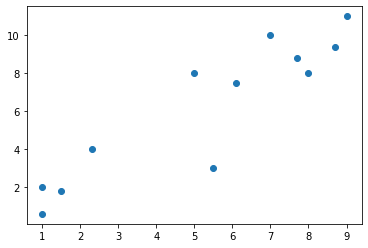

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


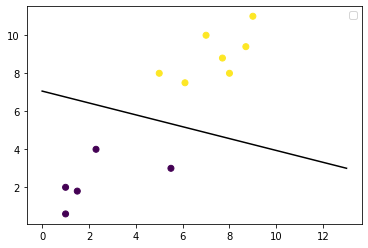

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])
plt.scatter(X, y)
plt.show()

training_X = np.vstack((X, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]
clf = svm.SVC(kernel='linear', C=1)
clf.fit(training_X, training_y)
w = clf.coef_[0]
a = -w[0] / w[1]
XX = np.linspace(0, 13)
yy = a * XX - clf.intercept_[0] / w[1]
plt.plot(XX, yy, 'k-')
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)
plt.legend()
plt.show()

In [ ]:
week 3 - dendogram

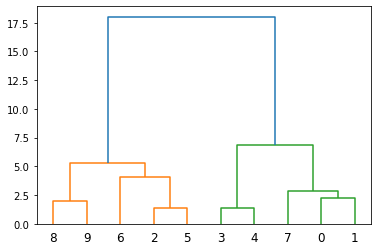

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]


data = list(zip(x, y))

linkage_data = linkage(data, method='ward')
dendrogram(linkage_data)

plt.show()

In [ ]:
week 4- jaccard distance

In [ ]:
def calculate_jaccard(word_tokens1, word_tokens2):
    both_tokens = word_tokens1 + word_tokens2
    union = set(both_tokens)
    intersection = set()
    for w in word_tokens1:
        if w in word_tokens2:
            intersection.add(w)
    jaccard_score = len(intersection)/len(union)
    return jaccard_score
a="sis"
b="sas"
print(calculate_jaccard(a,b))

0.3333333333333333


In [ ]:
week 5

In [ ]:
stemming

In [ ]:
# import these modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]

for w in words:
    print(w, " : ", ps.stem(w))

program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


In [ ]:
stop words

In [ ]:
from spacy.lang.en import English
nlp = English()

text = """ram is a student in anurag univerity where he gets to explore the laboratories at free times"""
my_doc = nlp(text)


token_list = []
for token in my_doc:
    token_list.append(token.text)

from spacy.lang.en.stop_words import STOP_WORDS

filtered_sentence =[]

for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_sentence.append(word)
print(token_list)
print(filtered_sentence)

['ram', 'is', 'a', 'student', 'in', 'anurag', 'univerity', 'where', 'he', 'gets', 'to', 'explore', 'the', 'laboratories', 'at', 'free', 'times']
['ram', 'student', 'anurag', 'univerity', 'gets', 'explore', 'laboratories', 'free', 'times']
